In [11]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import optuna
import numpy as np
from sklearn.model_selection import train_test_split


In [12]:
df_train = pd.read_csv("/Users/aswathshakthi/PycharmProjects/MLOps/Predictive_maintenance/data/processed/df_train_processed.csv")
df_train

,cycle,s2,s3,s4,s7,s8,s11,s12,s13,s14,s15,s17,s20,s21,RUL
0,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,643.49,1597.98,1428.63,551.43,2388.19,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,197,643.54,1604.50,1433.58,550.86,2388.23,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,198,643.42,1602.46,1428.18,550.94,2388.24,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,199,643.23,1605.26,1426.53,550.68,2388.25,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


In [13]:
df_test = pd.read_csv("/Users/aswathshakthi/PycharmProjects/MLOps/Predictive_maintenance/data/processed/df_test_processed.csv")
df_test

,cycle,s2,s3,s4,s7,s8,s11,s12,s13,s14,s15,s17,s20,s21,RUL
0,1,643.02,1585.29,1398.21,553.90,2388.04,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,112
1,2,641.71,1588.45,1395.42,554.85,2388.01,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,112
2,3,642.46,1586.94,1401.34,554.11,2388.05,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,112
3,4,642.44,1584.12,1406.42,554.07,2388.03,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737,112
4,5,642.51,1587.19,1401.92,554.16,2388.01,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,194,643.24,1599.45,1415.79,553.41,2388.02,47.69,520.69,2388.00,8213.28,8.4715,394,38.65,23.1974,20
13092,195,643.22,1595.69,1422.05,553.22,2388.05,47.60,521.05,2388.09,8210.85,8.4512,395,38.57,23.2771,20
13093,196,643.44,1593.15,1406.82,553.04,2388.11,47.57,521.18,2388.04,8217.24,8.4569,395,38.62,23.2051,20
13094,197,643.26,1594.99,1419.36,553.37,2388.07,47.61,521.33,2388.08,8220.48,8.4711,395,38.66,23.2699,20


In [14]:
# Assume df_train and df_test are already loaded DataFrames with 'RUL' as the target variable

X_train = df_train.drop(columns=['RUL'])
y_train = df_train[['RUL']]
X_test = df_test.drop(columns=['RUL'])
y_test = df_test[['RUL']]

In [15]:
# Normalisation
scaler = MinMaxScaler()

# Fit the scaler on the training data_processing and transform both training and test data_processing
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)


In [16]:

# log transform stabilises variance and makes distribution more comparable
# Transform target variable
y_train_normalized = np.log(y_train + 1)
y_test_normalized = np.log(y_test + 1)

In [17]:



X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train_normalized, y_train_normalized, test_size=0.2, random_state=42)

### Model

In [18]:

# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    params = {
        'objective': 'reg:squarederror',
        'booster': trial.suggest_categorical('booster', ['gbtree']),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0)
    }

    # Initialize RandomForest with suggested hyperparameters
    model = xgb.XGBRegressor(**params, random_state=42,n_jobs=-1)

    # 5-fold cross-validation on the train set
    cv_scores = cross_val_score(model, X_train_part, y_train_part, cv=5, scoring='r2')
    
    return cv_scores.mean()

# Create study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=60)

# Get the best hyperparameters
print(f'Best hyperparameters: {study.best_params}')

[I 2024-09-09 11:02:04,545] A new study created in memory with name: no-name-946cd7b1-0331-4484-a8ac-5c75601ec66b
[I 2024-09-09 11:02:05,554] Trial 0 finished with value: 0.13637547492980956 and parameters: {'booster': 'gbtree', 'n_estimators': 71, 'learning_rate': 0.0013498352745368333, 'max_depth': 6, 'subsample': 0.6340342820906038, 'colsample_bytree': 0.5484668498245414, 'lambda': 1.6583282516784708, 'alpha': 1.848538683530365}. Best is trial 0 with value: 0.13637547492980956.
[I 2024-09-09 11:02:08,778] Trial 1 finished with value: 0.8869575023651123 and parameters: {'booster': 'gbtree', 'n_estimators': 397, 'learning_rate': 0.016335498113328607, 'max_depth': 4, 'subsample': 0.5914970941665822, 'colsample_bytree': 0.965546106257042, 'lambda': 0.005934838170497568, 'alpha': 0.03467527631509674}. Best is trial 1 with value: 0.8869575023651123.
[I 2024-09-09 11:02:40,641] Trial 2 finished with value: 0.8787145376205444 and parameters: {'booster': 'gbtree', 'n_estimators': 492, 'learn

Best hyperparameters: {'booster': 'gbtree', 'n_estimators': 469, 'learning_rate': 0.014135672072196898, 'max_depth': 6, 'subsample': 0.5294820956414361, 'colsample_bytree': 0.6947908806225822, 'lambda': 0.00990259428348253, 'alpha': 0.0042688873100331865}


In [19]:
best_model = xgb.XGBRegressor(**study.best_params, random_state=42, n_jobs=-1)
best_model.fit(X_train_part, y_train_part)

XGBRegressor(alpha=0.0042688873100331865, base_score=None, booster='gbtree',
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6947908806225822, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             lambda=0.00990259428348253, learning_rate=0.014135672072196898,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=469, n_jobs=-1, ...)

In [20]:
best_model.save_model("/Users/aswathshakthi/PycharmProjects/MLOps/Predictive_maintenance/models/xgboost.json")

In [21]:
loaded_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)
loaded_model.load_model('/Users/aswathshakthi/PycharmProjects/MLOps/Predictive_maintenance/models/xgboost.json')

In [22]:
# Predict on train, validation, and test sets
y_train_pred = loaded_model.predict(X_train_part)
y_valid_pred = loaded_model.predict(X_valid)
y_test_pred = loaded_model.predict(X_test_normalized)

In [23]:
y_train_pred = np.expm1(y_train_pred)
y_valid_pred = np.expm1(y_valid_pred)
y_test_pred = np.expm1(y_test_pred)

y_train_original = np.expm1(y_train_part)
y_valid_original = np.expm1(y_valid)
y_test_original = np.expm1(y_test_normalized)

 ### Evaluation

In [24]:
r2_train = r2_score(y_train_original, y_train_pred)
r2_valid = r2_score(y_valid_original, y_valid_pred)
r2_test = r2_score(y_test_original, y_test_pred)

print(f'R-squared - Train: {r2_train}')
print(f'R-squared - Validation: {r2_valid}')
print(f'R-squared - Test: {r2_test}')

R-squared - Train: 0.7571252584457397
R-squared - Validation: 0.7244778871536255
R-squared - Test: -3.2901721000671387


In [25]:
mse_train = mean_squared_error(y_train_original, y_train_pred)
mse_valid = mean_squared_error(y_valid_original, y_valid_pred)
mse_test = mean_squared_error(y_test_original, y_test_pred)

print(f'MSE - Train: {mse_train}')
print(f'MSE - Validation: {mse_valid}')
print(f'MSE - Test: {mse_test}')

MSE - Train: 1162.8731890861256
MSE - Validation: 1258.80409999898
MSE - Test: 7348.869016027605


### Validation Plot

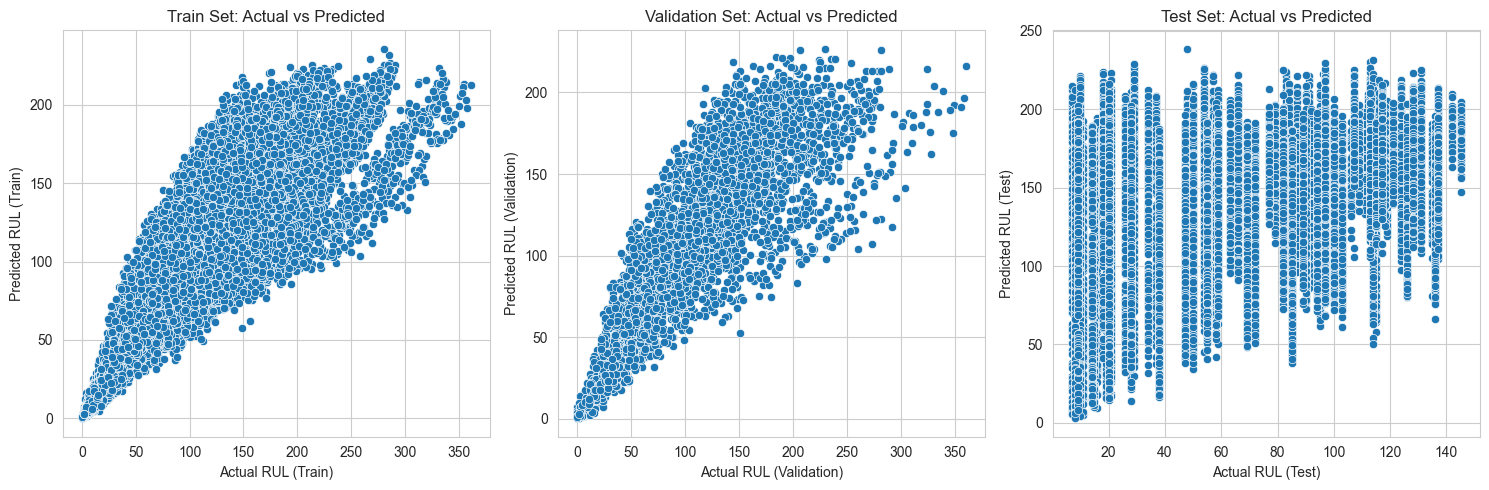

In [26]:


plt.figure(figsize=(15, 5))

# Convert DataFrame to NumPy array and flatten
y_train_original_flat = np.ravel(y_train_original.values)
y_train_pred_flat = np.ravel(y_train_pred)
y_valid_original_flat = np.ravel(y_valid_original.values)
y_valid_pred_flat = np.ravel(y_valid_pred)
y_test_original_flat = np.ravel(y_test_original.values)
y_test_pred_flat = np.ravel(y_test_pred)

# Plot for Train set
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_train_original_flat, y=y_train_pred_flat)
plt.xlabel('Actual RUL (Train)')
plt.ylabel('Predicted RUL (Train)')
plt.title('Train Set: Actual vs Predicted')

# Plot for Validation set
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_valid_original_flat, y=y_valid_pred_flat)
plt.xlabel('Actual RUL (Validation)')
plt.ylabel('Predicted RUL (Validation)')
plt.title('Validation Set: Actual vs Predicted')

# Plot for Test set
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test_original_flat, y=y_test_pred_flat)
plt.xlabel('Actual RUL (Test)')
plt.ylabel('Predicted RUL (Test)')
plt.title('Test Set: Actual vs Predicted')

plt.tight_layout()
plt.show()

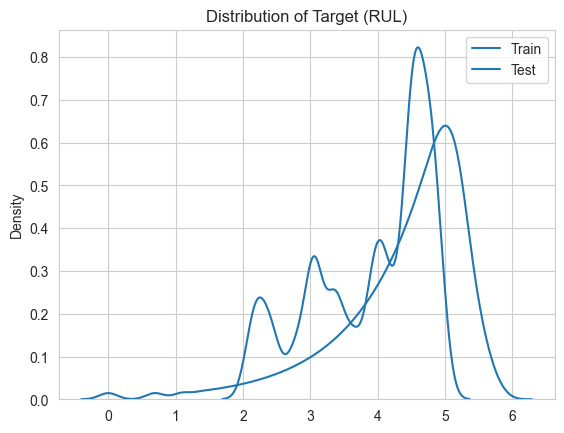

In [27]:
sns.kdeplot(y_train_normalized, label='Train')
sns.kdeplot(y_test_normalized, label='Test')
plt.title('Distribution of Target (RUL)')
plt.legend()
plt.show()